In [2]:
import numpy as np
import matplotlib.pyplot as plt
import diplib as dip

DIPlib -- a quantitative image analysis library
Version 3.5.1 (Jul  5 2024)
For more information see https://diplib.org


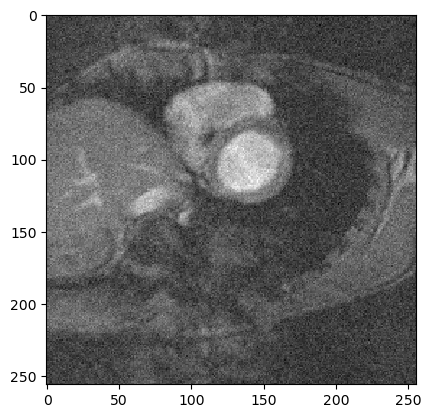

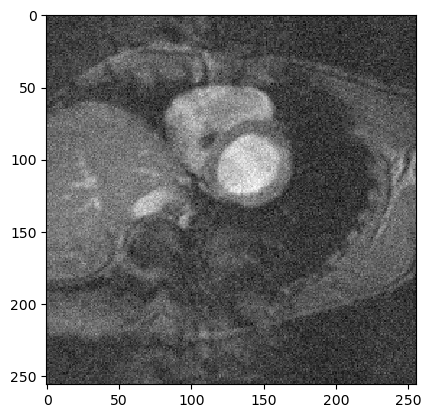

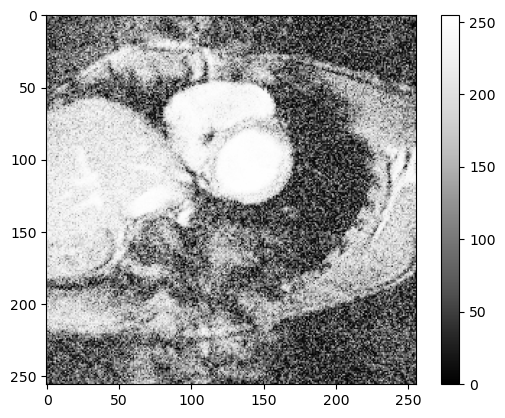

In [3]:
files = ['./body1.tif', './body2.tif', './body5.tif']

body1 = dip.ImageRead(files[0])
body2 = dip.ImageRead(files[1])
body5 = dip.ImageRead(files[2])

N,M  = np.shape(body1)

body1.Show()
body2.Show()

body1_eq = dip.HistogramEqualization(body1)

plt.imshow(body1_eq, cmap = 'Greys_r')
plt.colorbar()
plt.show()

hist1 = dip.Histogram(body1_eq)

In [4]:
print(hist1)

def Shannon_entropy(image):
    #calculate Shannon's entropy (slide ... lecture ... AP3132)
    #Assumption: Image is 256 level grayscale image. (since that is the case for the used images)

    N = np.size(image)

    levels = np.arange(0,256,1)
    hist, bin_edges = np.histogram(image, bins = levels)

    p = hist/N

    H = 0

    for i in levels[:-1]:
        if p[i] != 0:
            H += -p[i]*np.log10(p[i])
    
    return H

example = [0, 0, 0, 3, 4, 2, 5, 3, 0, 0, 0]
H_example = Shannon_entropy(example)

print(H_example)

1D histogram: 256 bins, lower bound: -0.5, upper bound: 255.5, bin size: 1

0.5622138221009683


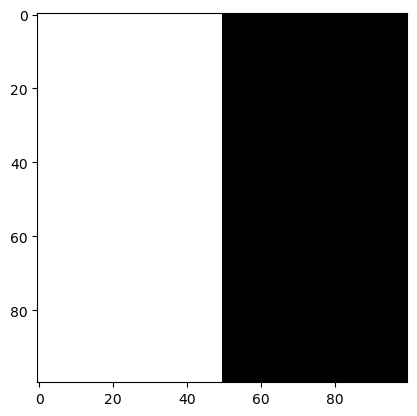

0.3010299956639812 0.3010299956639812


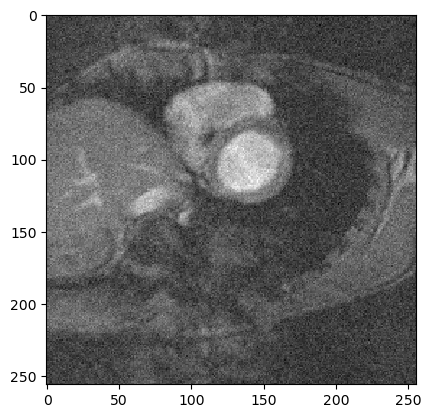

2.0593038301400006


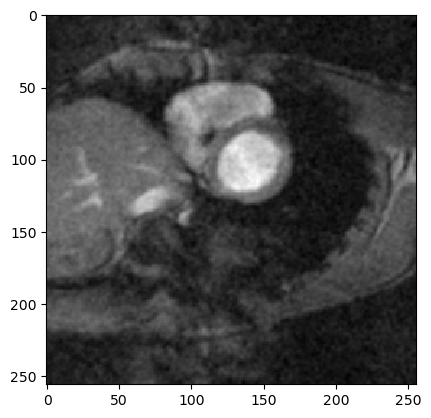

1.9684427657754637


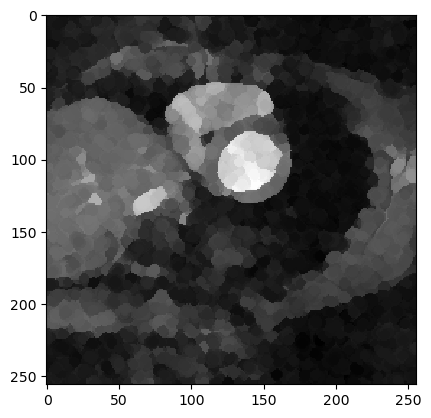

1.929193390148405


In [5]:
x = np.linspace(0,1, 100)
X,Y = np.meshgrid(x,x)

half_full = (X < 0.5)*255

dip.Image(half_full).Show()
print(Shannon_entropy(half_full), -np.log10(0.5))

body1.Show()
print(Shannon_entropy(body1))

body1_smoothed = dip.Gauss(body1)
body1_smoothed.Show()

print(Shannon_entropy(body1_smoothed))

body1_kuwahara = dip.Kuwahara(body1)
body1_kuwahara.Show()

print(Shannon_entropy(body1_kuwahara))

0.822461779220784
0.3019658649811525


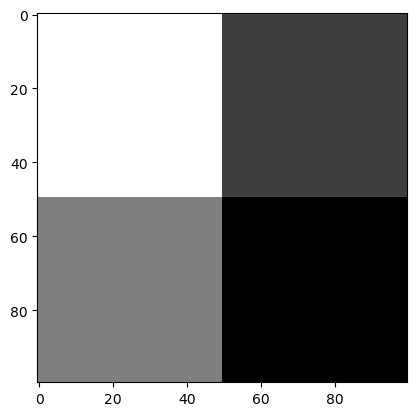

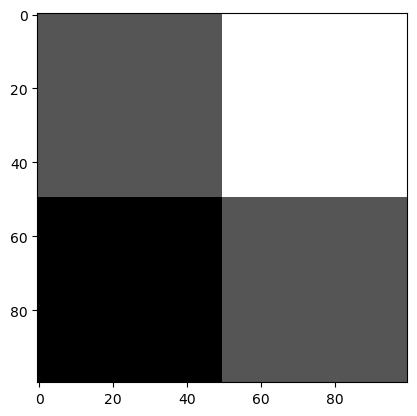

0.6020599913279624 0.6020599913279624
0.45154499349597177 0.6020599913279624 0.45154499349597177


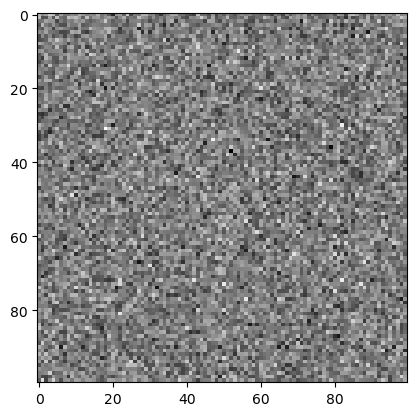

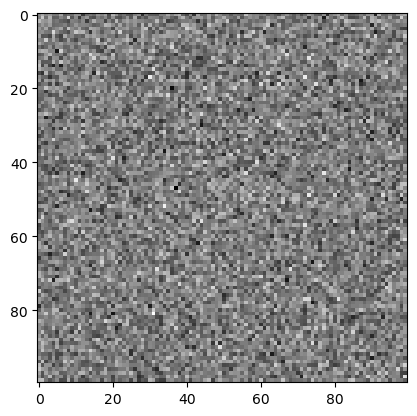

1.6096131597737642 1.6096131597737642 3.1507859927274953
0.06844032682003309


In [20]:
def Shannon_entropy2(im1, im2):
    N = np.size(im1)

    levels = np.arange(0,256,1)
    #levels, levels = np.meshgrid(levels, levels)
    hist, bin_edges1, bin_edges2 = np.histogram2d( im1, im2, bins = levels)
    
    p = hist.flatten()/N

    H = 0

    for i in range( np.size(hist)):
        if p[i] != 0:
            H += - p[i] *np.log10( p[i])

    return H
    

def MI(im1, im2):
    return Shannon_entropy(im1) + Shannon_entropy(im2) - Shannon_entropy2(im1,im2)

f_ex = example
g_ex = [0, 4, 3, 2, 5, 4, 0, 0, 0, 0, 0]

print(Shannon_entropy2(f_ex, g_ex))
print(MI(f_ex,g_ex))

f = 2*half_full + np.rot90(half_full, 3)
f = (f == 0)*0 + (f == 255)*63 + (f==2*255)*127 + (f==3*255)*255
g = (f == 0)*127 + (f == 63)*255 + (f==127)*63 + (f==255)*127

dip.Image(f).Show()
dip.Image(g).Show()

print(Shannon_entropy2(f.flatten(),g.flatten()), -np.log10(0.25))
print(MI(f.flatten(),g.flatten()), Shannon_entropy(f.flatten()), Shannon_entropy(g.flatten()))

np.random.seed(0)
h = np.random.normal(128, 10, [100, 100])
dip.Image(h).Show()
hrot = np.rot90(h)


dip.Image(hrot).Show()

print(Shannon_entropy(h.flatten()), Shannon_entropy(hrot.flatten()), Shannon_entropy2(h.flatten(), hrot.flatten()))
print(MI(h.flatten(), hrot.flatten()))



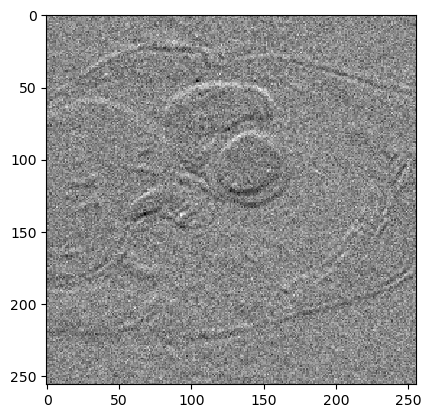

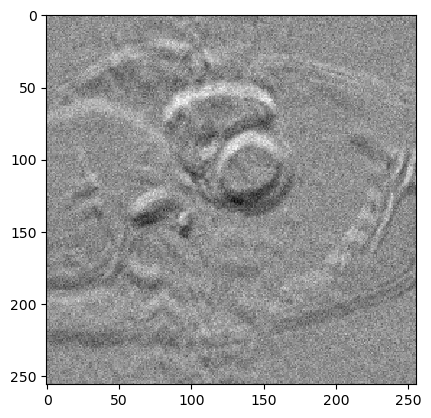

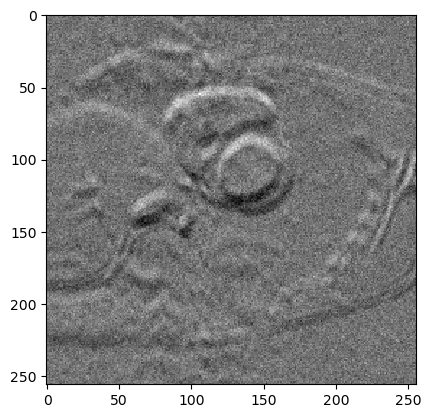

squared difference 1 and 2 441.2408
squared difference 1 and 5 769.07275
0.2815142511555049
0.20711691270608146


In [22]:
body1_arr = np.array(body1)
body1_arr = body1_arr.flatten()
body2_arr = np.array(body2)
body2_arr = body2_arr.flatten()
body5_arr = np.array(body5)
body5_arr = body5_arr.flatten()

diff12 = body1 - body2
diff15 = body1 - body5
diff25 = body2 - body5

diff12.Show()
diff15.Show()
diff25.Show()

print('squared difference 1 and 2', np.var(diff12))
print('squared difference 1 and 5', np.var(diff25))

print(MI(body1_arr, body2_arr))
print(MI(body1_arr, body5_arr))